# <center>Project - 'Credit Card Approval Prediction' </center>

## <center><u> Index - Notebook 2 </u></center>

#### 1. Scaling the Data using StandardScaler

#### 2. Model Training

    1. Logistic Regression

        1.1 Model Training
        1.2 Model Prediction and Accuracy
        1.3 Confusion Matrix
        1.4 Classification Report
        1.5 ROC Curve (Receiver Operating Characteristic)
        1.6 Cross-Validation
        1.7 Hyperparameter Tuning: GridSearchCV
        1.8 Model with Best Parameters

    2. Decision Tree Classifier

        2.1 Model Training
        2.2 Model Prediction and Accuracy
        2.3 Confusion Matrix
        2.4 Classification Report
        2.5 ROC Curve (Receiver Operating Characteristic)
        2.6 Cross-Validation
        2.7 Hyperparameter Tuning: GridSearchCV
        2.8 Model with Best Parameters

    3. Random Forest Classifier

        3.1 Model Training
        3.2 Model Prediction and Accuracy
        3.3 Confusion Matrix
        3.4 Classification Report
        3.5 ROC Curve (Receiver Operating Characteristic)
        3.6 Cross-Validation
        3.7 Hyperparameter Tuning: GridSearchCV
        3.8 Model with Best Parameters


#### 3. Model Selection

        Comparing on the basis of Testing Accuracy, Mean Cross-Validation Accuracy and AUC (Area Under the ROC Curve)

#### 4. Feature Importance on Random Forest Model
        
        Using Entropy 

In [2]:
!pip install imbalanced-learn


Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Obtaining dependency information for scikit-learn<2,>=1.3.2 from https://files.pythonhosted.org/packages/50/79/d21599fc44d2d497ced440480670b6314ebc00308e3bae0d0ebca44cd481/scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
  Using cach

In [3]:
!pip install scikit-learn==1.3.0 imbalanced-learn==0.11.0



Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for scikit-learn==1.3.0 from https://files.pythonhosted.org/packages/5c/e9/ee572691a3fb05555bcde41826faad29ae4bc1fb07982e7f53d54a176879/scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Obtaining dependency information for imbalanced-learn==0.11.0 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: scikit-learn
    Found existing installa

In [4]:
import pandas as pd  # Data manipulation using DataFrames
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # Standardizing numerical features
# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt  
# Machine Learning Models 
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.svm import SVC  # Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors
  # Gradient Boosting
from sklearn.model_selection import cross_val_score, KFold  # Cross-Validation
# Model Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import GridSearchCV  # Grid search for hyperparameter tuning
from sklearn.metrics import roc_curve, auc  # Receiver Operating Characteristic (ROC) curve
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE # Handling Imbalanced Classes

In [5]:
# Reading the cleaned credit data from a CSV file saved in the notebook 1
Credit_data_cleaned = pd.read_csv('Credit_data_cleaned_ML.csv')

In [6]:
Credit_data_cleaned.columns

Index(['Ind_ID', 'Gender', 'Car_Owner', 'Propert_Owner', 'Annual_income',
       'Type_Income', 'Education', 'Marital_status', 'Housing_type', 'Label',
       'Age', 'Employed_Years', 'Age_Category'],
      dtype='object')

# 1.  Scaling the Data 
Using StandardScaler

In [7]:
# Defining features for model training
features = ['Employed_Years', 'Annual_income', 'Age', 'Type_Income', 'Education', 'Marital_status']
X = Credit_data_cleaned[features]
y = Credit_data_cleaned['Label']

# Performing a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Model Training

## 1. Logistic Regression

### 1.1 Model training

In [8]:
# Creating and fitting the Logistic Regression model 
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

### 1.2 Model Prediction and Accuracy

In [9]:
# Making predictions on the training set
y_train_pred_lr = lr_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
print(f"Calculating training accuracy: {train_accuracy:.2f}")

# Making predictions on the test set
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
print(f"Calculating testing accuracy: {test_accuracy:.2f}")

Calculating training accuracy: 0.91
Calculating testing accuracy: 0.87


### 1.3 Confusion Matrix

<Figure size 800x600 with 0 Axes>

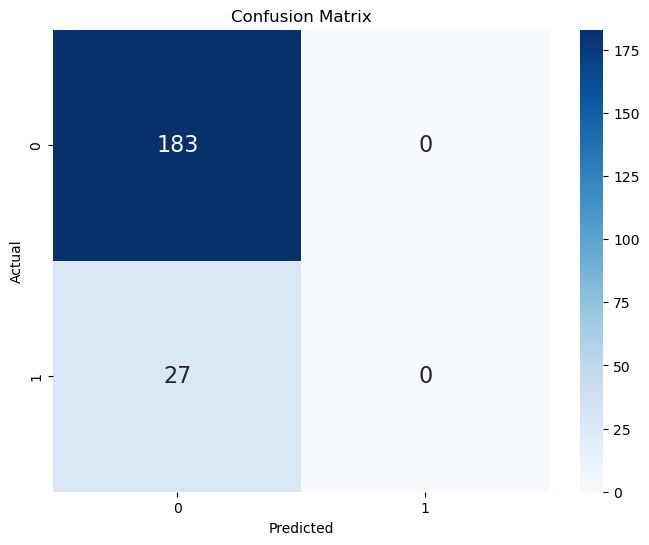

In [10]:
# Calculating the confusion matrix 
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 1.4 Classification Report

In [11]:
# Evaluating the performance of the model
class_report_lr = classification_report(y_test, y_test_pred_lr)
print(class_report_lr)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       183
           1       0.00      0.00      0.00        27

    accuracy                           0.87       210
   macro avg       0.44      0.50      0.47       210
weighted avg       0.76      0.87      0.81       210



### 1.5 Roc Cruve (Receiver Operating Characteristic)

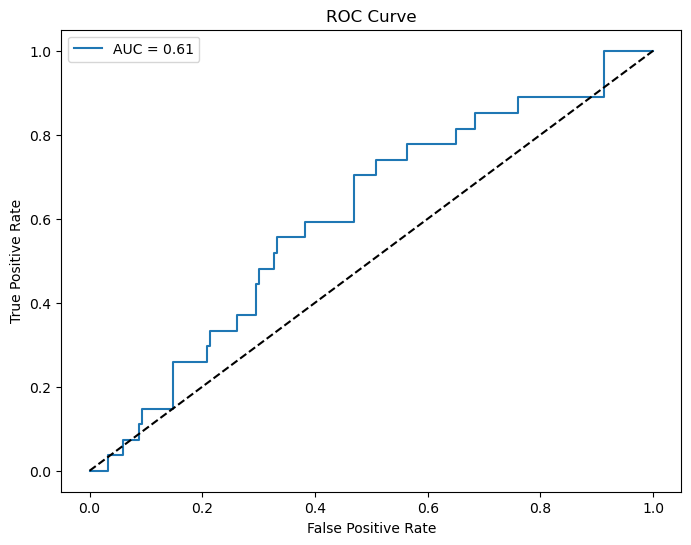

In [12]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_lr = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 1.6 Cross Validation 

In [13]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Logistic Regression model
cross_val_accuracy_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (LR): {cross_val_accuracy_lr}")

# Calculating the mean cross-validation accuracy for Logistic Regression
print(f"Mean Cross-Validation Accuracy (LR): {np.mean(cross_val_accuracy_lr):.2f}")

Cross-Validation Accuracy (LR): [0.91071429 0.9047619  0.89221557 0.92215569 0.91616766]
Mean Cross-Validation Accuracy (LR): 0.91


### 1.7  Hyperparameter Tuning: GridSearchCV

In [14]:
# Setting up the parameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjusting the regularization parameter
    'max_iter': [100, 200, 300],  # Setting the maximum number of iterations
}

# Setting up GridSearchCV for logistic regression
grid_search_lr = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_lr = grid_search_lr.best_params_
print("Best Parameters (Logistic Regression):", best_params_lr)

Best Parameters (Logistic Regression): {'C': 0.001, 'max_iter': 100}


### 1.8 Model with Best Parameters

In [15]:
# Defining the best hyperparameters for Logistic Regression
best_params_lr = {'C': 0.001, 'max_iter': 100}

# Creating the Logistic Regression model with the best hyperparameters
best_lr_model = LogisticRegression(**best_params_lr, random_state=42)
best_lr_model.fit(X_train_scaled, y_train)
y_pred_lr = best_lr_model.predict(X_test_scaled)

# Calculating the accuracy of the Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy (LR): {accuracy_lr:.2f}")

Accuracy (LR): 0.87


## 2. Decision Tree Classifier

- In decision tree models, normalization is not necessary. Decision trees are not sensitive to the scale of the features.

### 2.1 Model training

In [16]:
# Creating and fitting the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 2.2 Model Prediction and Accuracy

In [17]:
# Making predictions on the training set
y_pred_dt = dt_model.predict(X_test)

# Calculating testing accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.2f}")

Accuracy: 0.84


### 2.3 Confusion Matrix

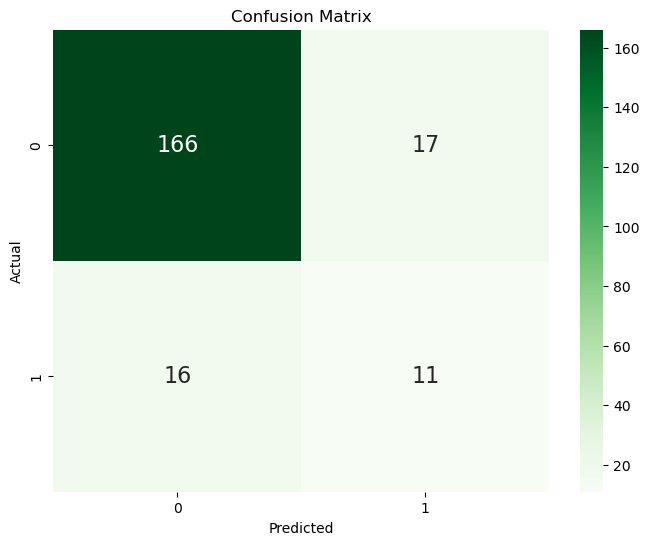

In [18]:
# Calculating the confusion matrix 
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Greens", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 2.4 Classification Report

In [19]:
# Evaluating the performance of the model
class_report_dt = classification_report(y_test, y_pred_dt)
print(class_report_dt)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       183
           1       0.39      0.41      0.40        27

    accuracy                           0.84       210
   macro avg       0.65      0.66      0.65       210
weighted avg       0.85      0.84      0.84       210



### 2.5 Roc Cruve (Receiver Operating Characteristic)

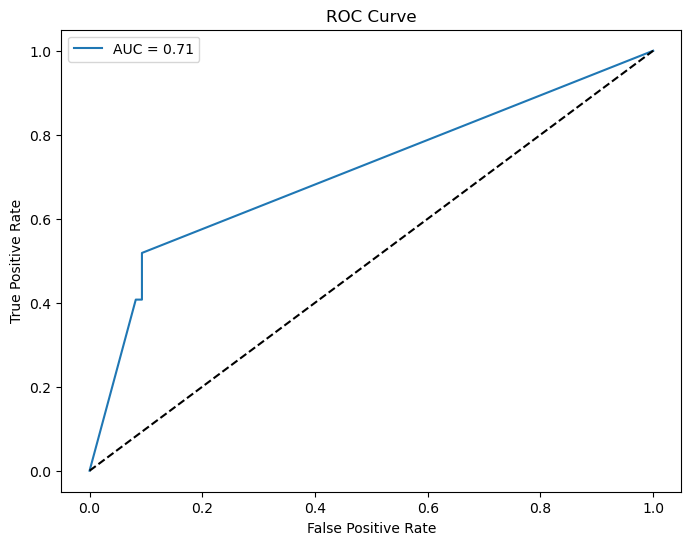

In [20]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_dt = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 2.6 Cross Validation 

In [21]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Decision Tree model
cross_val_accuracy_dt = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (DT): {cross_val_accuracy_dt}")

# Calculating the mean cross-validation accuracy for Decision Tree model
print(f"Mean Cross-Validation Accuracy (DT): {np.mean(cross_val_accuracy_dt):.2f}")

Cross-Validation Accuracy (DT): [0.86904762 0.88095238 0.8502994  0.8742515  0.92814371]
Mean Cross-Validation Accuracy (DT): 0.88


### 2.7  Hyperparameter Tuning: GridSearchCV

In [22]:
# Setting up the parameter grid for grid search
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Setting up GridSearchCV for Decision Tree model
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_dt.fit(X_train, y_train)

# Retrieving the best parameters from the grid search
best_params_dt = grid_search_dt.best_params_
print("Best Parameters (Decision Tree):", best_params_dt)


Best Parameters (Decision Tree): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}


### 2.8 Model with Best Parameters

In [23]:
# Defining the best hyperparameters for Decision Tree model
best_params_dt = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

# Creating the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_model.fit(X_train_scaled, y_train)
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculating the accuracy of the Decision Tree model 
accuracy_dt_bp = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy (DT): {accuracy_dt_bp:.2f}")

Accuracy (DT): 0.85


## 3. Random Forest Classifier

### 3.1 Model training

In [24]:
# Creating and fitting the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### 3.2 Model Prediction and Accuracy

In [25]:
# Making predictions on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Calculating training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_rf)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Making predictions on the test set
y_test_pred_rf = rf_model.predict(X_test_scaled)

# Calculating testing accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Testing Accuracy: {test_accuracy_rf:.2f}")

Training Accuracy: 0.99
Testing Accuracy: 0.91


### 3.3 Confusion Matrix

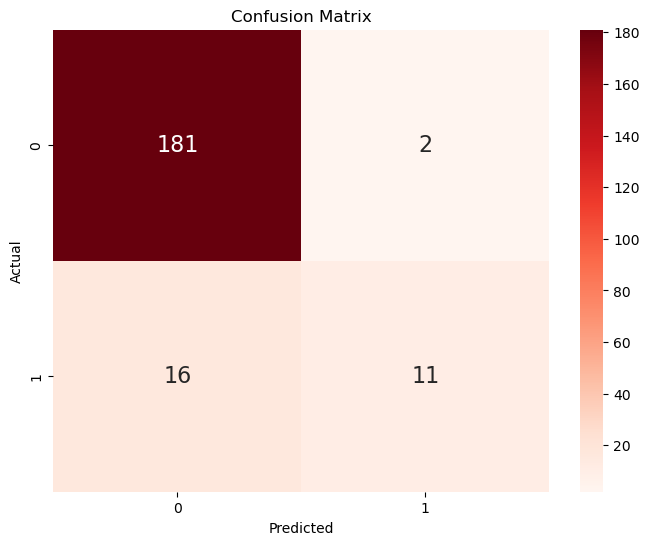

In [34]:
# Calculating the confusion matrix 
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(8, 6))

# Visualizing the confusion matrix with heatmap 
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Reds", annot_kws={"size": 16})

# Adding title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Displaying the heatmap
plt.show()

### 3.4 Classification Report

In [27]:
# Evaluating the performance of the model
class_report_rf = classification_report(y_test, y_test_pred_rf)
print(class_report_rf)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       183
           1       0.85      0.41      0.55        27

    accuracy                           0.91       210
   macro avg       0.88      0.70      0.75       210
weighted avg       0.91      0.91      0.90       210



### 3.5 Roc Cruve (Receiver Operating Characteristic)

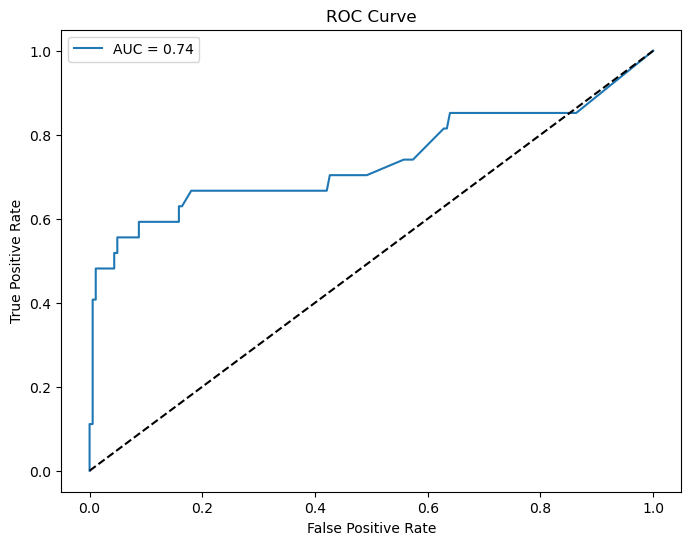

In [28]:
# Calculating the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])

# Calculating AUC (Area Under the ROC Curve) 
roc_auc_rf = auc(fpr, tpr)

# Plotting the ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### 3.6 Cross Validation 

In [29]:
# Creating a cross-validation object 
random_seed = 42
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Performing cross-validation for Random Forest model
cross_val_accuracy_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=kf, scoring='accuracy')
print(f"Cross-Validation Accuracy (RF): {cross_val_accuracy_rf}")

# Calculating the mean cross-validation accuracy for Random Forest model
print(f"Mean Cross-Validation Accuracy (RF): {np.mean(cross_val_accuracy_rf):.2f}")

Cross-Validation Accuracy (RF): [0.91666667 0.95238095 0.89820359 0.94011976 0.95209581]
Mean Cross-Validation Accuracy (RF): 0.93


### 3.7  Hyperparameter Tuning: GridSearchCV

In [30]:
# Setting up the parameter grid for grid search
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Setting up GridSearchCV for Random Forest model
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)

# Fitting the model with the training data
grid_search_rf.fit(X_train_scaled, y_train)

# Retrieving the best parameters from the grid search
best_params_rf = grid_search_rf.best_params_
print("Best Parameters (Random Forest):", best_params_rf)

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### 3.8 Model with Best Parameters

In [31]:
# Defining the best hyperparameters for Random Forest model
best_params_rf = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

# Creating the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_model.fit(X_train_scaled, y_train)
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculating the accuracy of the Random Forest model
accuracy_rf_bp = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (RFC): {accuracy_rf_bp:.2f}")

Accuracy (RFC): 0.90


In [32]:
variables = {
    'Logistic Regression': [test_accuracy, accuracy_lr, cross_val_accuracy_lr, roc_auc_lr],
    'Decision Tree': [accuracy_dt, accuracy_dt_bp, cross_val_accuracy_dt, roc_auc_dt],
    'Random Forest': [test_accuracy_rf, accuracy_rf_bp, cross_val_accuracy_rf, roc_auc_rf],
    
}

# Calculate mean for the "Mean Cross-Validation Accuracy" column
for model, vars_list in variables.items():
    vars_list[2] = sum(vars_list[2]) / len(vars_list[2])

# Convert the dictionary to a DataFrame
model_selection_df = pd.DataFrame.from_dict(variables, orient='index', columns=['Testing Accuracy before Hypertuning', 'Testing Accuracy after Hypertuning', 'Mean Cross-Validation Accuracy', 'AUC'])

# Format all values to two decimal places
model_selection_df = model_selection_df.applymap(lambda x: f'{x:.2f}' if isinstance(x, (float, int)) else x)

# Display the results
model_selection_df


,Testing Accuracy before Hypertuning,Testing Accuracy after Hypertuning,Mean Cross-Validation Accuracy,AUC
Logistic Regression,0.87,0.87,0.91,0.61
Decision Tree,0.84,0.85,0.88,0.71
Random Forest,0.91,0.90,0.93,0.74


#### Testing Accuracy:

- **Random Forest:** It has the highest testing accuracy after hypertuning (0.90). This suggests that, on the test set, it performs well in correctly predicting credit card approval.

#### Mean Cross-Validation Accuracy:

- **Random Forest:** It again shows the highest mean cross-validation accuracy (0.93). This indicates consistent and robust performance across different subsets of the training data.

#### AUC (Area Under the ROC Curve):

- **Random Forest and Gradient Boosting:** Both have the highest AUC values (0.74), indicating good discrimination ability between positive and negative classes.

### Model Selected - Random Forest

# 4. Feature Importance on Random Forest Model 
Using Entropy

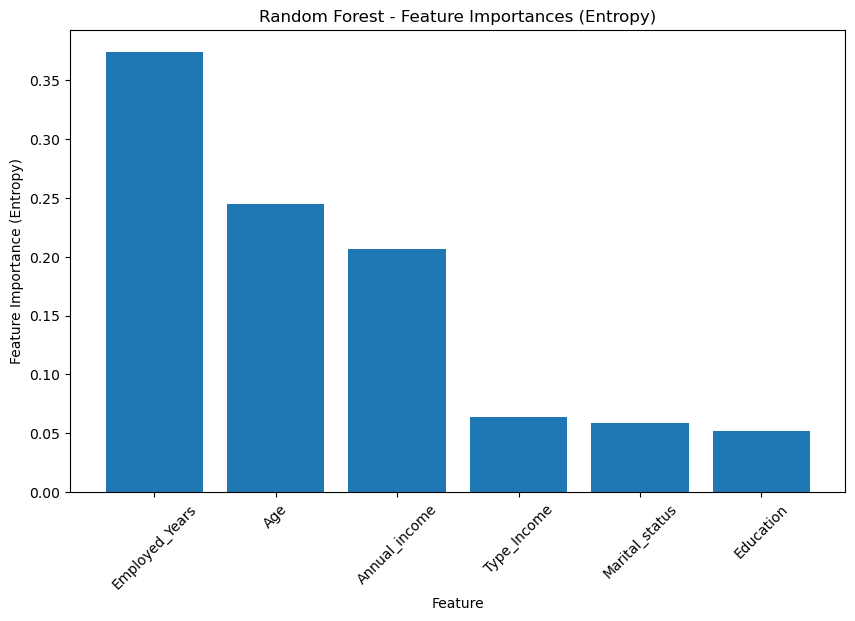

In [33]:
# Extracting feature importances
feature_importances_entropy = best_rf_model.feature_importances_

# Getting the names of features
feature_names_entropy = X_train.columns

# Sorting feature importances in descending order
indices_entropy = feature_importances_entropy.argsort()[::-1]

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances_entropy[indices_entropy], align="center")
plt.xticks(range(X_train.shape[1]), feature_names_entropy[indices_entropy], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance (Entropy)")
plt.title("Random Forest - Feature Importances (Entropy)")
plt.show()